### LSE Data Analytics Online Career Accelerator 

# Employer Project: Bank of Engand Sentiment Analysis

## Introduction: Bank of England (BOE)

The [Kaggle data set](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) used in this project use speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Central banks are institutions that define monetary policy. As such, central bank speeches are widely followed and have a major influence on financial markets.

You can also refer to the raw data set and article used [here](https://www.kaggle.com/datasets/magnushansson/central-bank-speeches).

Note that, due to the large number of speeches contained in the data set, you can expect long running times for processing intensive steps such as sentiment analysis when using the full data set (30-60 mins). It is recommended that you reduce the subset of data under review when creating your prototype and then run the full data set through, if required, once the code behaves as expected. You can reduce the data set to, for example, only process data from the United Kingdom (or other countries) or by looking at specific date ranges.

The code is not extensive and you will be expected to use the provided code as a starting point only. You will also need to use your own creativity and logic to identify useful patterns in the data. You can explore sentiment, polarity and entities/keywords, and should use appropriate levels of granularity and aggregation in order to analyse patterns contained in the data.

1. __All Speeches- all_speeches.csv:__ Speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022: 
> - reference, country, date, title, author, is_gov, text.


__Context:__ In this fast-evolving contemporary digital world, understanding how to effectively tackle
data is paramount, particularly for financial institutions like the Bank of England. Their decisions,
backed by data driven insights, influences not just the UK’s monetary and financial stability, but also
the global economic system. One major tool the Bank uses to conveys its stance and views is
through speeches delivered by its representatives at various public events. <br>

__The Problem:__ The evolving sentiment within these speeches can provide valuable insights into the
bank’s current and future strategies. However, a plethora of questions remain unanswered:<br>
- Has the sentiment of central bank speeches changed over time, and if so, in what ways?
- Are there discernible trends in the sentiment expressed in these speeches?
- How does the sentiment correlate with major economic indicators like the UK's GDP growth,
inflation, unemployment, and wages?
- Furthermore, does the sentiment expressed in these speeches have the power to predict
market behaviours?

__Significance:__ Understanding these sentiments can play a pivotal role in predicting market trends
and aligning the bank’s communication to stabilise financial markets. Moreover, as the Bank of
England aims to steer the economy through its policies, its communication becomes a key
instrument in achieving those policy objectives. Prior Natural Language Processing (NLP) and
Machine Learning techniques (Extreme Gradient Boosting model) on central bank speeches and
Large Language Models (LLMs) using GPT-3.5 on Bank of England Monetary Policy Committee
(MPC) member speeches have demonstrated predictive abilities for financial markets response.<br>

__Objectives:__ Ultimately, the goal is to refine the Bank of England’s communication strategies by
leveraging sentiment analysis. This will help in making more informed data-driven decisions,
understanding the key impacts, gauging financial indicators, and tailoring communications to
maintain stable markets.

# 1. Initial Exploratory Analysis 

## 1a. Data Importation and Cleaning

1. Import dataset
2. Import all speeches
3. Collect and import more UK Speech data. E.g monetary policy announcement etc
4. Import financial metric data (see data folder) 
- Inflation 
- GDP 
- Unemployment
- FTSE/ S&P
- Market Momentum
- Interest rates
- Guilds/ gilts/ bonds
- Merge the databases in Python 
- Merge by date of economic metrics 

In [ ]:
# Install the necessary libraries.
#!pip install nltk
#!pip install vaderSentiment
#!pip install textblob

In [1]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/RyanLin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/RyanLin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/RyanLin/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/RyanLin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Load dataset. Change directory as required.
df = pd.read_csv('../Data/01_raw/Core_data/all_speeches.csv')

In [3]:
df.head()

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [4]:
df.country.value_counts()

euro area         2351
united states     1551
united kingdom    1209
japan              755
canada             620
sweden             600
switzerland        351
australia          284
Name: country, dtype: int64

In [5]:
df[df['country']=='united kingdom'].sort_values('date').head()

,reference,country,date,title,author,is_gov,text
4961,r980915a_BOE,united kingdom,1998-09-15,Speech,george,0,"Thank you, Chairman. I'm actually very pleased..."
4962,r981021b_BOE,united kingdom,1998-10-21,Britain in Europe,george,0,It's a great pleasure to be here in the beauti...
4963,r981021a_BOE,united kingdom,1998-10-21,Impact of the recent turbulence in internation...,king,1,Few industries have suffered more from volatil...
4964,r981101a_BOE,united kingdom,1998-11-01,"Economic policy, with and without forecasts",budd,0,My topic this evening is the use of forecasts ...
4965,r981101b_BOE,united kingdom,1998-11-01,Inflation targeting in practice: the UK experi...,vickers,0,"Six years ago this week, sterling left the exc..."


In [6]:
# Subset the DataFrame
subset_df = df[df['country'] == 'united kingdom'].sort_values('date').head()

In [7]:
# Check for duplicates
duplicates = subset_df.duplicated()
print("Duplicate rows:")
print(subset_df[duplicates])

# Check for missing values
missing_values = subset_df.isnull()
print("Missing values:")
print(subset_df[missing_values])

Duplicate rows:
Empty DataFrame
Columns: [reference, country, date, title, author, is_gov, text]
Index: []
Missing values:
     reference country date title author  is_gov text
4961       NaN     NaN  NaN   NaN    NaN     NaN  NaN
4962       NaN     NaN  NaN   NaN    NaN     NaN  NaN
4963       NaN     NaN  NaN   NaN    NaN     NaN  NaN
4964       NaN     NaN  NaN   NaN    NaN     NaN  NaN
4965       NaN     NaN  NaN   NaN    NaN     NaN  NaN


No duplicates or missing values present

### Normalise the Sentiment Score Range

Normalise sentiment score and have the max and min sentiment as our end ranges
- developing our own scale for sentiment/ polarity, choosing to normalise the data
- The highest threshold would be the highest sentiment/ polarity in the dataset and lowest the lower threshold in the data analysis.
- This is because speeches by the BoE are mostly positive or lean towards being neutral and more vague. So creating our own range of scores in relation to the existing range of scores would make more sense. 

### Rolling Average or ARIMA

1. BoE have already stated that they are looking for longer time periods, not short term time periods. 
2. A rolling average may give a better overview of the time period in question (e.g. a quarter) and economic metrics can fluctuate a lot in short amounts of time. 
3. Consider does this lose some data accuracy in the process?

# Initial Exploratory Analysis

In [ ]:
# Adding a column to calculate the string length per speech.
df['len'] = df['text'].str.len()
df

In [8]:
# Subset the data to reduce processing time.
dfi = df[df['country']=='united kingdom'].sort_values('date').reset_index(drop=True)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  1209 non-null   object
 1   country    1209 non-null   object
 2   date       1209 non-null   object
 3   title      1209 non-null   object
 4   author     1209 non-null   object
 5   is_gov     1209 non-null   int64 
 6   text       1209 non-null   object
dtypes: int64(1), object(6)
memory usage: 66.2+ KB


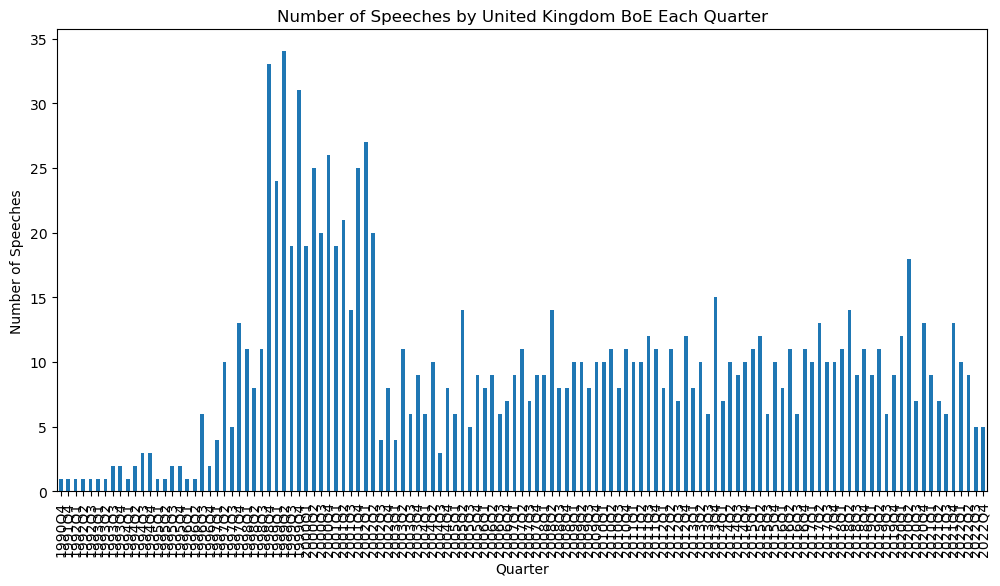

In [12]:
# Convert date to datetime format
dfi['date'] = pd.to_datetime(df['date'])

# Create a new column 'quarter' with the quarter information
dfi['quarter'] = dfi['date'].dt.to_period('Q')  

# Group the data by quarter and count the number of speeches in each quarter
quarterly_speech_count = dfi.groupby('quarter').size()

# Plot the data
plt.figure(figsize=(12, 6))
quarterly_speech_count.plot(kind='bar')
plt.title('Number of Speeches by United Kingdom BoE Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Speeches')

# Customise the x-axis labels to display only the year
plt.xticks(range(len(quarterly_speech_count.index)), [str(quarter) for quarter in quarterly_speech_count.index], rotation=0)
plt.xticks(rotation=90)

plt.show()

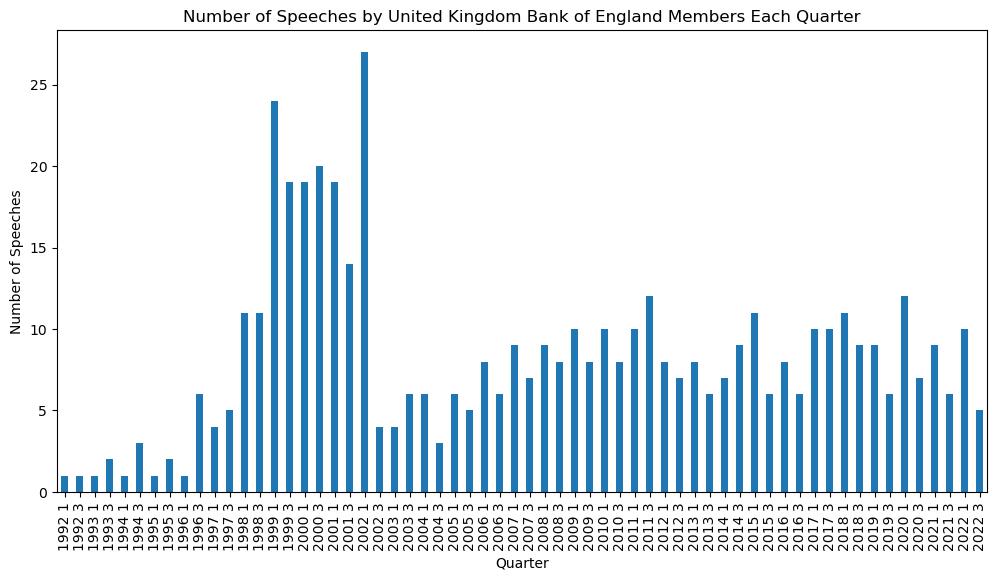

In [13]:
# Define the quarters you want to display (Q1 and Q3)
quarters_to_display = ['Q1', 'Q3']

# Filter the quarters to display
quarterly_speech_count = quarterly_speech_count[quarterly_speech_count.index.quarter.isin([1, 3])]

# Plot the data
plt.figure(figsize=(12, 6))
quarterly_speech_count.plot(kind='bar')
plt.title('Number of Speeches by United Kingdom Bank of England Members Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Speeches')

# Customize the x-axis labels
plt.xticks(range(len(quarterly_speech_count.index)), [f'{quarter.year} {quarter.quarter}' for quarter in quarterly_speech_count.index], rotation=0)
plt.xticks(rotation=90)

plt.show()

In [14]:
# Convert to lower case and remove punctuation.
dfi['text'] = dfi['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfi['text'] = dfi['text'].str.replace('[^\w\s]','',regex=True)
dfi

,reference,country,date,title,author,is_gov,text,quarter
0,r980915a_BOE,united kingdom,1990-11-28,Speech,george,0,thank you chairman im actually very pleased to...,1990Q4
1,r981021b_BOE,united kingdom,1991-10-03,Britain in Europe,george,0,its a great pleasure to be here in the beautif...,1991Q4
2,r981021a_BOE,united kingdom,1992-03-14,Impact of the recent turbulence in internation...,king,1,few industries have suffered more from volatil...,1992Q1
3,r981101a_BOE,united kingdom,1992-05-29,"Economic policy, with and without forecasts",budd,0,my topic this evening is the use of forecasts ...,1992Q2
4,r981101b_BOE,united kingdom,1992-08-17,Inflation targeting in practice: the UK experi...,vickers,0,six years ago this week sterling left the exch...,1992Q3
...,...,...,...,...,...,...,...,...
1204,r221007a_BOE,united kingdom,2002-04-30,"Shocks, inflation, and the policy response",ramsden,0,thank you very much for the invitation to spea...,2002Q2
1205,r221012a_BOE,united kingdom,2002-05-08,Monetary policy: an anchor in challenging times,pill,0,huw pill talks about how we will bring inflati...,2002Q2
1206,r221015a_BOE,united kingdom,2002-05-09,Monetary policy and financial stability interv...,bailey,1,we are meeting in the most difficult of times ...,2002Q2
1207,r221019a_BOE,united kingdom,2002-05-16,"Governance of “Decentralised” Finance: Get up,...",wilkins,0,these are divided into seven categories suffra...,2002Q2


In [15]:
# Tokenize the text into words or subword units. 
# Tokenization is important for creating a structured representation of the text.
dfi['text'] = dfi['text'].apply(lambda x: word_tokenize(x))

In [16]:
# Stop Word Removal
stop_words = set(stopwords.words('english'))
dfi['text'] = dfi['text'].apply(lambda x: [word for word in x if word not in stop_words])

In [17]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
dfi['text'] = dfi['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

## Load Sentiment Wordlist

In [ ]:
%%time
# Demo: Sentiment intensity analysis using Vadar sentiment and a for loop.
sia = SentimentIntensityAnalyzer()
dft = pd.DataFrame(columns=['neg', 'neu', 'pos', 'compound'])
for j in dfi.index:
    score = sia.polarity_scores(dfi.iloc[j,6])
    new_row = pd.DataFrame({'neg': score['neg'], 'neu': score['neu'], 'pos': score['pos'], 'compound': score['compound']}, index=[j])
    dft = pd.concat([dft, new_row], ignore_index=True)
dfi = pd.concat([dfi, dft], axis=1, join="inner")
dfi

In [ ]:
%%time
# Demo: Using a self defined function with Textblob to calculate polarity and subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
dfi[['polarity','subjectivity']] = dfi['text'].apply(generate_polarity_subjectivity)
dfi.head()

## Highest Occurring Topics

### Frequency distribution review of a single speech.

In [ ]:
%%time
# Demo: Frequency distribution review of a single speech.

# Tokenise the text data.
stop_words=set(stopwords.words('english'))
filtered_text = []

# Example speech using iloc to reference (Hint: Can be used in loops if required).
tokenized_word = word_tokenize(dfi.iloc[0,6])

# Filter the tokenised words.
for each_word in tokenized_word:
    if each_word.lower() not in stop_words and each_word.isalpha():
        filtered_text.append(each_word.lower())

# Display the filtered list.
print('Tokenised list without stop words: {}'.format(filtered_text))

# Create a frequency distribution object.
freq_dist_of_words = FreqDist(filtered_text)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(10)

In [ ]:
# Set plotting options and plot the data.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(20, 10)
freq_dist_of_words.plot(25, cumulative=False)
plt.show()